In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install anesthetic
import os
os.chdir("/content/drive/MyDrive/project")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import torch
import torch.nn as nn
import torch.distributions as dists
from torch.distributions import MultivariateNormal
from torch.distributions.distribution import Distribution
from np_utils import simple_data, curved_data
from torch_utils import rotation_test
from tension_net import TensionNet
from tension_quantify import GaussianKDE, BayesFactorKDE

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
x = np.random.randn(10000) + 5
X = torch.tensor(x).float()
X = X.unsqueeze(1)
y = np.linspace(2, 8, 100)
Y = torch.tensor(y).float()

kde = GaussianKDE(X, device)
probs = kde.prob(Y)
cdf_probs = kde.cdf(torch.tensor(y).float())

kde_scipy = gaussian_kde(x)
probs_scipy = kde_scipy(y)
cdf_probs_scipy = np.cumsum(probs_scipy)
cdf_probs_scipy /= np.max(cdf_probs_scipy)

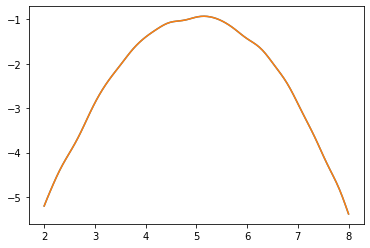

In [8]:
plt.plot(y, kde.log_prob(Y))
plt.plot(y, kde_scipy.logpdf(y))

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("Pytorch vs SciPy/NumPy Implemenation of Gaussian KDE")

axs[0].plot(y, probs, label="PyTorch")
axs[0].plot(y, probs_scipy, label="SciPy")
axs[0].set_title("PDF")
axs[0].legend()

axs[1].plot(y, cdf_probs, label="PyTorch")
axs[1].plot(y, cdf_probs_scipy, label="SciPy")
axs[1].set_title("CDF")
axs[1].legend()

fig.tight_layout()

In [ ]:
flat_X = kde.cdf(X.squeeze())
plt.hist(flat_X)

In [ ]:
X0, X1, X_prior = simple_data(dims=2, distance=1, fixed=True)

tension_R = TensionNet(2)
criterion = BayesFactorKDE(n_points=1000)

thetas, losses, _ = rotation_test(tension_R, criterion, device, X0, X1, X_prior)

In [ ]:
plt.plot(thetas, losses)